In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,auc,roc_auc_score, classification_report,accuracy_score, recall_score
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
%matplotlib inline

In [2]:
df= pd.read_csv("creditcard.csv")

In [3]:
class_dist=df['Class'].value_counts()
print(class_dist)
print('\nClass 0: {:0.2f}%'.format(100 *class_dist[0] / (class_dist[0]+class_dist[1])))
print('Class 1: {:0.2f}%'.format(100 *class_dist[1] / (class_dist[0]+class_dist[1])))

0    284315
1       492
Name: Class, dtype: int64

Class 0: 99.83%
Class 1: 0.17%


([<matplotlib.axis.XTick at 0x29c24601d00>,
 [Text(0, 0, 'Genuine'), Text(1, 0, 'Fraud')])

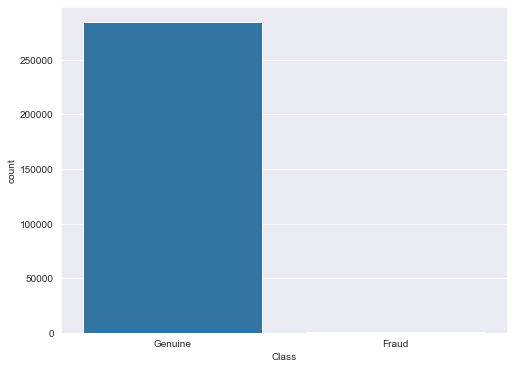

In [4]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x= 'Class', data= df)
Labels= ('Genuine', 'Fraud')
plt.xticks(range(2), Labels)

In [5]:
X = df.drop(columns=['Time','Class'])
y = df['Class']

x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=100,test_size=0.3,stratify=y)

Recall Score  0.6351351351351351
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.83      0.64      0.72       148

    accuracy                           1.00     85443
   macro avg       0.92      0.82      0.86     85443
weighted avg       1.00      1.00      1.00     85443



<AxesSubplot:>

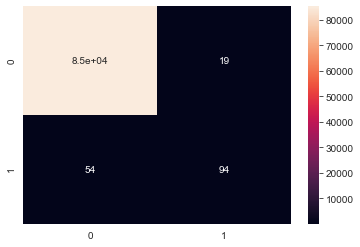

In [6]:
lr = LogisticRegression() 
lr.fit(x_train, y_train.ravel()) 
predictions = lr.predict(x_test) 
  
print('Recall Score ',recall_score(y_test,predictions))
print(classification_report(y_test, predictions)) 
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='.2g')

In [7]:
print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
 
undersample = RandomUnderSampler(sampling_strategy='majority')
X_train_res, y_train_res = undersample.fit_resample(x_train, y_train.ravel())
  
print('After UnderSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After UnderSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After UnderSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before UnderSampling, counts of label '1': 344
Before UnderSampling, counts of label '0': 199020 

After UnderSampling, the shape of train_X: (688, 29)
After UnderSampling, the shape of train_y: (688,) 

After UnderSampling, counts of label '1': 344
After UnderSampling, counts of label '0': 344


([<matplotlib.axis.XTick at 0x29c2480b0d0>,
 [Text(0, 0, 'Genuine'), Text(1, 0, 'Fraud')])

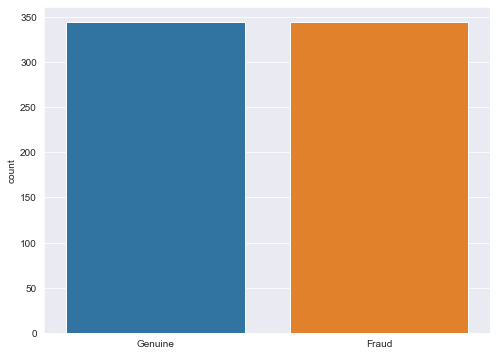

In [8]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x= y_train_res, data= df)
Labels= ('Genuine', 'Fraud')
plt.xticks(range(2), Labels)

Recall Score  0.8783783783783784
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85295
           1       0.04      0.88      0.08       148

    accuracy                           0.97     85443
   macro avg       0.52      0.92      0.53     85443
weighted avg       1.00      0.97      0.98     85443



<AxesSubplot:>

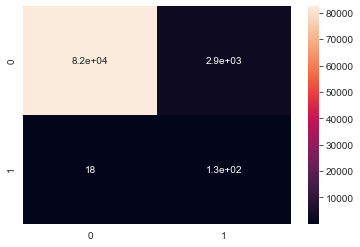

In [9]:
lr = LogisticRegression() 
lr.fit(X_train_res, y_train_res.ravel()) 
predictions = lr.predict(x_test) 
  
print('Recall Score ',recall_score(y_test,predictions))
print(classification_report(y_test, predictions)) 
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='.2g')

In [10]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
 
undersample = RandomOverSampler()
X_train_res, y_train_res = undersample.fit_resample(x_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 344
Before OverSampling, counts of label '0': 199020 

After OverSampling, the shape of train_X: (398040, 29)
After OverSampling, the shape of train_y: (398040,) 

After OverSampling, counts of label '1': 199020
After OverSampling, counts of label '0': 199020


([<matplotlib.axis.XTick at 0x29c24826e20>,
 [Text(0, 0, 'Genuine'), Text(1, 0, 'Fraud')])

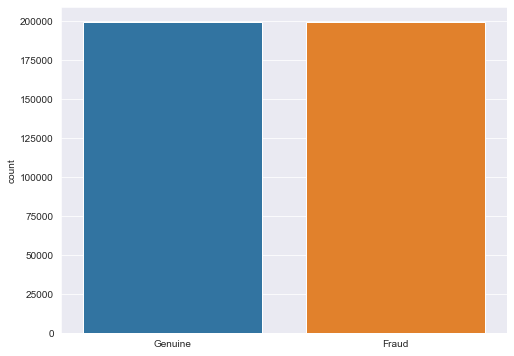

In [11]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x= y_train_res, data= df)
Labels= ('Genuine', 'Fraud')
plt.xticks(range(2), Labels)

Recall Score  0.8918918918918919
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85295
           1       0.06      0.89      0.11       148

    accuracy                           0.97     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.97      0.99     85443



<AxesSubplot:>

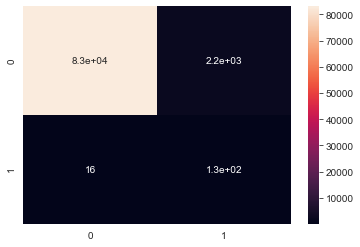

In [12]:
lr = LogisticRegression() 
lr.fit(X_train_res, y_train_res.ravel()) 
predictions = lr.predict(x_test) 
  
print('Recall Score ',recall_score(y_test,predictions))
print(classification_report(y_test, predictions)) 
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='.2g')

In [13]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
 
from imblearn.over_sampling import SMOTE
sm = SMOTE() 
X_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

Before OverSampling, counts of label '1': 344
Before OverSampling, counts of label '0': 199020 

After OverSampling, the shape of train_X: (398040, 29)
After OverSampling, the shape of train_y: (398040,) 

After OverSampling, counts of label '1': 199020
After OverSampling, counts of label '0': 199020


([<matplotlib.axis.XTick at 0x29c24712c40>,
 [Text(0, 0, 'Genuine'), Text(1, 0, 'Fraud')])

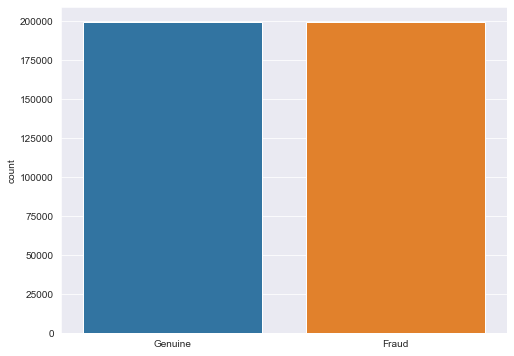

In [14]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x= y_train_res, data= df)
Labels= ('Genuine', 'Fraud')
plt.xticks(range(2), Labels)

Recall Score  0.8648648648648649
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.07      0.86      0.13       148

    accuracy                           0.98     85443
   macro avg       0.54      0.92      0.56     85443
weighted avg       1.00      0.98      0.99     85443



<AxesSubplot:>

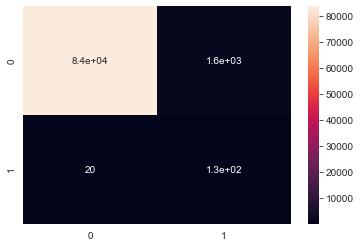

In [16]:
lr = LogisticRegression() 
lr.fit(X_train_res, y_train_res.ravel()) 
predictions = lr.predict(x_test) 
  
print('Recall Score ',recall_score(y_test,predictions))
print(classification_report(y_test, predictions)) 
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='.2g')

In [18]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

from imblearn.over_sampling import BorderlineSMOTE
sm = BorderlineSMOTE()
X_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 344
Before OverSampling, counts of label '0': 199020 

After OverSampling, the shape of train_X: (398040, 29)
After OverSampling, the shape of train_y: (398040,) 

After OverSampling, counts of label '1': 199020
After OverSampling, counts of label '0': 199020


([<matplotlib.axis.XTick at 0x29c247c34c0>,
 [Text(0, 0, 'Genuine'), Text(1, 0, 'Fraud')])

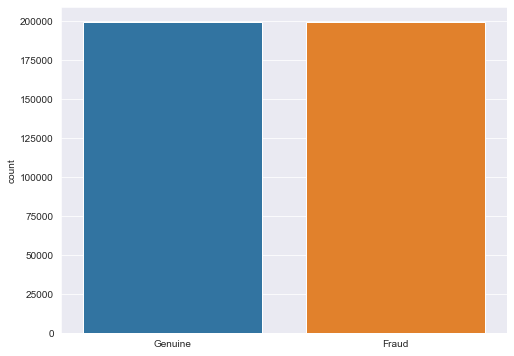

In [19]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x= y_train_res, data= df)
Labels= ('Genuine', 'Fraud')
plt.xticks(range(2), Labels)

Recall Score  0.8648648648648649
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.14      0.86      0.24       148

    accuracy                           0.99     85443
   macro avg       0.57      0.93      0.62     85443
weighted avg       1.00      0.99      0.99     85443



<AxesSubplot:>

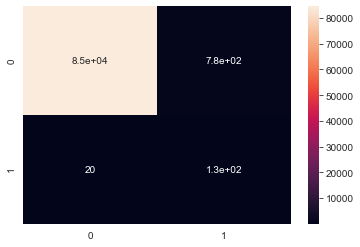

In [20]:
lr = LogisticRegression() 
lr.fit(X_train_res, y_train_res.ravel()) 
predictions = lr.predict(x_test) 
  
print('Recall Score ',recall_score(y_test,predictions))
print(classification_report(y_test, predictions)) 
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='.2g')

In [21]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
 
# trying ADASYN
from imblearn.over_sampling import ADASYN
oversample = ADASYN()
X_train_res, y_train_res = oversample.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

Before OverSampling, counts of label '1': 344
Before OverSampling, counts of label '0': 199020 

After OverSampling, the shape of train_X: (398082, 29)
After OverSampling, the shape of train_y: (398082,) 

After OverSampling, counts of label '1': 199062
After OverSampling, counts of label '0': 199020


([<matplotlib.axis.XTick at 0x29c24cca550>,
 [Text(0, 0, 'Genuine'), Text(1, 0, 'Fraud')])

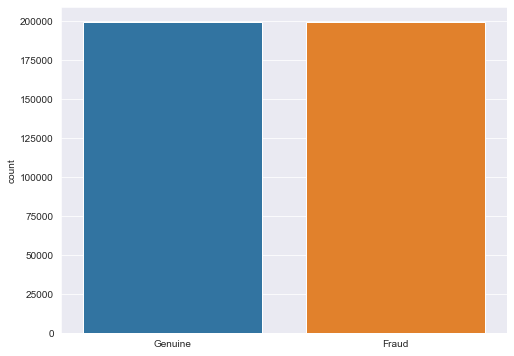

In [22]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x= y_train_res, data= df)
Labels= ('Genuine', 'Fraud')
plt.xticks(range(2), Labels)

Recall Score  0.8918918918918919
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85295
           1       0.03      0.89      0.07       148

    accuracy                           0.96     85443
   macro avg       0.52      0.92      0.52     85443
weighted avg       1.00      0.96      0.98     85443



<AxesSubplot:>

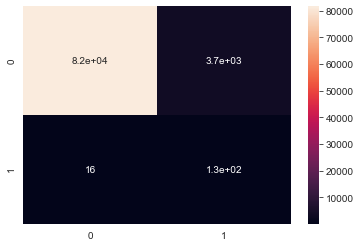

In [23]:
lr = LogisticRegression() 
lr.fit(X_train_res, y_train_res.ravel()) 
predictions = lr.predict(x_test) 
  
print('Recall Score ',recall_score(y_test,predictions))
print(classification_report(y_test, predictions)) 
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='.2g')

In [24]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
 
from imblearn.over_sampling import SVMSMOTE
oversample = SVMSMOTE()
X_train_res, y_train_res = oversample.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

Before OverSampling, counts of label '1': 344
Before OverSampling, counts of label '0': 199020 

After OverSampling, the shape of train_X: (398040, 29)
After OverSampling, the shape of train_y: (398040,) 

After OverSampling, counts of label '1': 199020
After OverSampling, counts of label '0': 199020


([<matplotlib.axis.XTick at 0x29c2570ed30>,
 [Text(0, 0, 'Genuine'), Text(1, 0, 'Fraud')])

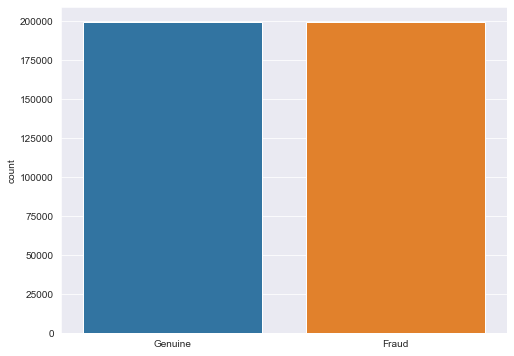

In [25]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x= y_train_res, data= df)
Labels= ('Genuine', 'Fraud')
plt.xticks(range(2), Labels)

Recall Score  0.8648648648648649
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.17      0.86      0.29       148

    accuracy                           0.99     85443
   macro avg       0.59      0.93      0.64     85443
weighted avg       1.00      0.99      1.00     85443



<AxesSubplot:>

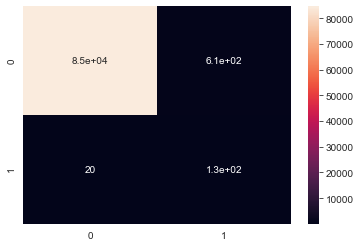

In [26]:
lr = LogisticRegression() 
lr.fit(X_train_res, y_train_res.ravel()) 
predictions = lr.predict(x_test) 
  
print('Recall Score ',recall_score(y_test,predictions))
print(classification_report(y_test, predictions)) 
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='.2g')

In [27]:
print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
 
undersample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_train_res, y_train_res = undersample.fit_resample(x_train, y_train.ravel())
  
print('After UnderSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After UnderSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After UnderSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before UnderSampling, counts of label '1': 344
Before UnderSampling, counts of label '0': 199020 

After UnderSampling, the shape of train_X: (398040, 29)
After UnderSampling, the shape of train_y: (398040,) 

After UnderSampling, counts of label '1': 199020
After UnderSampling, counts of label '0': 199020


([<matplotlib.axis.XTick at 0x29c2583e670>,
 [Text(0, 0, 'Genuine'), Text(1, 0, 'Fraud')])

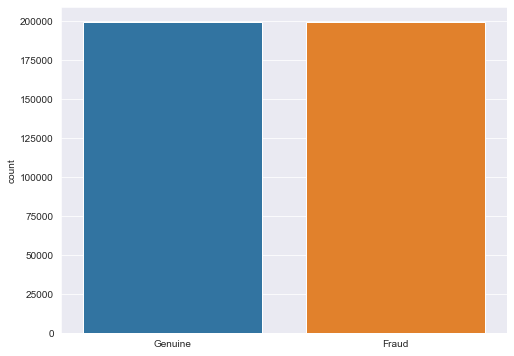

In [28]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x= y_train_res, data= df)
Labels= ('Genuine', 'Fraud')
plt.xticks(range(2), Labels)

Recall Score  0.8648648648648649
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.08      0.86      0.14       148

    accuracy                           0.98     85443
   macro avg       0.54      0.92      0.57     85443
weighted avg       1.00      0.98      0.99     85443



<AxesSubplot:>

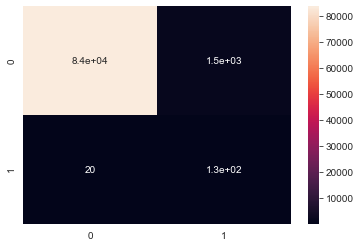

In [29]:
lr = LogisticRegression() 
lr.fit(X_train_res, y_train_res.ravel()) 
predictions = lr.predict(x_test) 
  
print('Recall Score ',recall_score(y_test,predictions))
print(classification_report(y_test, predictions)) 
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='.2g')